<a><h1> Linear Regression with PyTorch


<h6>we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<h6>we'll develop a collection of data points that appear random, but that fit a known linear equation y = 2x+1

<a><u><h3> Perform standard imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


<a><u><h3> Create a column matrix of X values

In [3]:
#CREATED X
X= torch.linspace(1,50,50).reshape(-1,1)
print(X)
print(X.shape)

#this will give 50 rows and 1 column

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])
torch.Size([50, 1])


<h6> Note that when we created tensor X, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that y doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between X and y.

<a><u><h3> Create a "Random" array of error values

We want 50 random integer values that collectively cancel each other out.

In [4]:
#CREATED ERROR
torch.manual_seed(71)
# this ensures whenever a random is generated it is same
# to obtain reproducible results

e=torch.randint(-8,9,(50,1),dtype=torch.float)

# (50,1) is the o/p Size
# -8,9 is the range

#to ensure that they cancel each other
print(e.sum())

tensor(0.)


<a><u><h3> Create a column matrix of y values


In [5]:
#CREATED Y
# WE will set our own parameters of weight =2, bias =1, plus the error amount.
# y will have same shape as X and e

y = 2*X + 1 + e
print(y.shape)


torch.Size([50, 1])


Now we know that we have used function y=2x +e <br>
we will give x and y to the network and train it to predict complete function

<a><u><h3> Plot the results </a></u></h3>
We have to convert tensors to NumPy arrays just for plotting.

Text(0.5, 0, 'x')

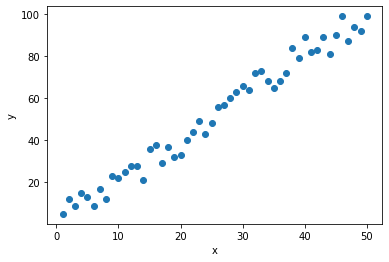

In [6]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

<a><u><h3> Simple Linear model </a></u></h3>

In [7]:
# built-in nn.Linear() model preselects weight and bias values at random.

torch.manual_seed(59)

# nn.linear model conatains 3 parameters, 2 written below and one is bias = True 
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


<a><u><h3> Model classes </a></u></h3>

PyTorch lets us define models as object classes that can store multiple model layers.<br>
 For now, though, we only need a single <tt>linear</tt> layer.

In [8]:
# nn.Module is base class for all Modules
class Model(nn.Module):

    #Constructor
    def __init__(self, in_features, out_features):
        #calls parent class nn.Module
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        # or (its same)
        # self.in_features = in_features
        # self.out_features = out_features
        # self.bias = bias

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [9]:
torch.manual_seed(59)
model= Model(1,1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias: ',model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:  0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [10]:
# second way of iterations
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277
